In [1]:
from abc import ABC, abstractmethod
from typing import Optional
import collections as cs
import enum as en
import numpy as np
import itertools as it
import more_itertools as mit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import sympy as sp
import scipy as sci
import operator as op
import random

In [2]:
from libs.environment.utils import *
from libs.utils.graph import *
from libs.environment.cost.tsp import *
from libs.solution.initial_solution_generators.heuristic import *
from libs.solution.initial_solution_generators.random import *

<AxesSubplot:xlabel='x', ylabel='y'>

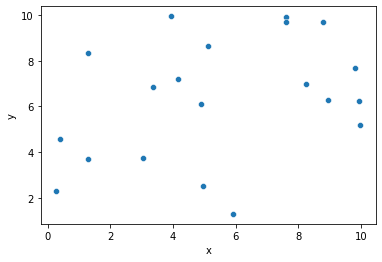

In [3]:
coords = coords_random(20, max_x=10, max_y=10)
sns.scatterplot(x=coords.x, y=coords.y)

<AxesSubplot:>

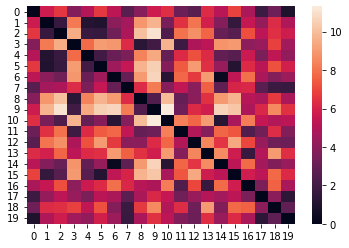

In [4]:
distances = coords_distances(coords, std_dev=0.1)
sns.heatmap(distances)

<class 'numpy.ndarray'>


<AxesSubplot:>

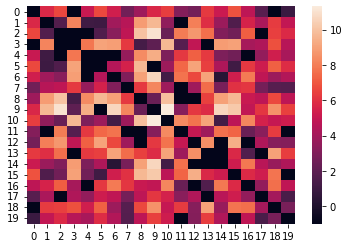

In [5]:
print(type(distances))
np.array(distances)
permitted_distances = disable_edges(distances, prohibition_p=0.1)
sns.heatmap(permitted_distances)

<AxesSubplot:>

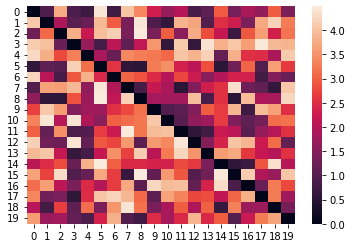

In [6]:
wind = wind_random(permitted_distances, max_velocity=2)
speed = 2.5
eff_speed = effective_speed(speed, wind)
sns.heatmap(eff_speed)

<AxesSubplot:>

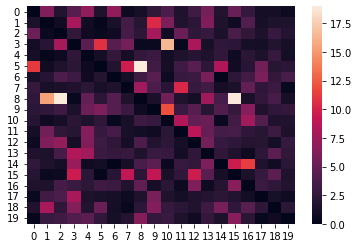

In [7]:
travel_t = travel_times(distances, eff_speed)
sns.heatmap(travel_t)

In [8]:
environment = EnvironmentTSPSimple(travel_t)

In [9]:
solution_creator = SolutionCreatorTSPSimpleHeuristicNN()
greedy_solution = solution_creator.create(environment, initial_vx=0)
greedy_solution

SolutionRepresentationTSP(representation=[0, 19, 17, 7, 14, 6, 10, 1, 5, 4, 2, 8, 3, 11, 9, 13, 16, 18, 12, 15])

In [11]:
vxs = list(range(coords.shape[0]))
print(
    f"{len(greedy_solution.representation) = }, success: {set(greedy_solution.representation) == set(vxs)}"
)

len(greedy_solution.representation) = 20, success: True


In [14]:
cost_calculator = TSPCostCalculatorSimple()
total_cost, step_cost = cost_calculator.calculate_total(greedy_solution, environment)
total_cost, step_cost

(18.655103244092352,
 deque([0.6314602445532902,
        0.42027626010147734,
        0.6912242703106463,
        1.086244663466797,
        0.11363457062316677,
        0.5994551898599249,
        0.7825527731019947,
        0.2511393716349838,
        0.6315741996923255,
        0.6157880443602793,
        2.239035640614306,
        0.43470799820791195,
        0.43655274692300244,
        0.8114830873935288,
        1.9622258950668592,
        0.622321937075763,
        2.32994492339932,
        1.6650798136507001,
        2.3304016140560746]))

In [13]:
for i, cost in enumerate(cost_calculator.stepper(greedy_solution, environment)):
    print(f"{i = }, {cost = }")

i = 0, cost = 0.6314602445532902
i = 1, cost = 0.42027626010147734
i = 2, cost = 0.6912242703106463
i = 3, cost = 1.086244663466797
i = 4, cost = 0.11363457062316677
i = 5, cost = 0.5994551898599249
i = 6, cost = 0.7825527731019947
i = 7, cost = 0.2511393716349838
i = 8, cost = 0.6315741996923255
i = 9, cost = 0.6157880443602793
i = 10, cost = 2.239035640614306
i = 11, cost = 0.43470799820791195
i = 12, cost = 0.43655274692300244
i = 13, cost = 0.8114830873935288
i = 14, cost = 1.9622258950668592
i = 15, cost = 0.622321937075763
i = 16, cost = 2.32994492339932
i = 17, cost = 1.6650798136507001
i = 18, cost = 2.3304016140560746


In [16]:
rnd_sol_creator = SolutionCreatorTSPSimpleRandom()
rnd_sol = rnd_sol_creator.create(environment, initial_vx=0)
print(
    f"{len(rnd_sol.representation) = }, success: {set(rnd_sol.representation) == set(vxs)}"
)

len(rnd_sol.representation) = 20, success: True
